# <u> Utilising Python for Analysis of the SARS-CoV-2 (COVID-19) Sequence. <u>

### SARS-CoV-2 (COVID-19) is a single standed RNA virus responsible for the world pandemic currently faced by mankind. Here, Python is used to demonstrate the utility of such coding langauges to further explore DNA sequences with real world applications.

#### <u> Installing Required Packages <u>

<i>Firstly, it is important to ensure that the required packages and functions are installed and imported. This is done with the following lines of code: <i>

In [28]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install pandas

In [30]:
 pip install primer3-py

Note: you may need to restart the kernel to use updated packages.


In [31]:
from Bio import SeqIO

In [32]:
from Bio.SeqUtils import GC

In [33]:
from Bio.SeqRecord import SeqRecord

In [34]:
import pandas as pd

In [35]:
import primer3

In [36]:
from Bio.Blast import NCBIWWW

In [125]:
from Bio import pairwise2

#### <u> Inputting and Exploring the Sequence <u> 

 <i> The complete genome assembly was obtained from https://www.nature.com/articles/s41586-020-2008-3 and  the complete genome sequence of COVID19 in GenBank can be found under the accession number MN908947. <i>

In [37]:
for sequence in SeqIO.parse("MN908947.fna", "fasta"):
    print('GenBankId: '  + sequence.id + '\nSize: ' + str(len(sequence))+' nucleotides')

GenBankId: MN908947.3
Size: 29903 nucleotides


<i> This line of code takes a file type, in this case a fasta sequence, and reports the sequence back as a SeqRecord object which can be read by Biopython. The str(len(sequence)) function can be used to take a string as an argument, e.g. the COVID-19 sequence, and return its length. The output states that the sequence length for the genome assembly of COVID-19 is 29,903 nucleotide bases long. <i>

In [137]:
Covid19 = SeqIO.read("MN908947.fna", "fasta")

In [138]:
Covid19DNA = Covid19.seq
print(DNA[:500])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG


<i> This takes the COVID-19 sequence and creates an object called Covid19 which is read in as a SeqRecord object that can be recognised by Biopython. An object called Covid19DNA is then created from just the sequence of Covid19. The first 500 nucleotides are then printed to view the sequence and ensure it has been read by the software correctly (29,903 nucleotides can be quite lengthy to read!). <i>

In [139]:
dna_list = list(Covid19DNA)

<i> The sequence loaded is initially read a string by Biopython, so in order to count the contents of the sequence assembly, the string must be converted into a list. This is done using the above function. <i>

<i> Counting of each respective nucleotide is undertaken using the following code: <i>

In [140]:
count_DNA = Covid19DNA
nucleotides={}
for n in count_DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)


n_count = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
n_count = n_count.rename(columns={0: 'frequency', 'index': 'nucleotides'})
n_count = n_count.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


<i> A loop is set up to count each nucleotide base (A, T, G and C). When the computer reads either an A, T , G or C from the DNA list, a 1 is added to that specific nucleotide which has been created into a dictonary called nucleotides through the use of '{}'. This allows for a value to be mapped onto each nucleotide base. If the computer does not read that specific nuceleotide then a one is not added and the value remains unchanged. This is done seperately for each nucleotide base until all four have been counted and this is then printed onto the screen to be evaluated. The dictionary nucleotides is then placed into a dataframe to create the graph below. <i>

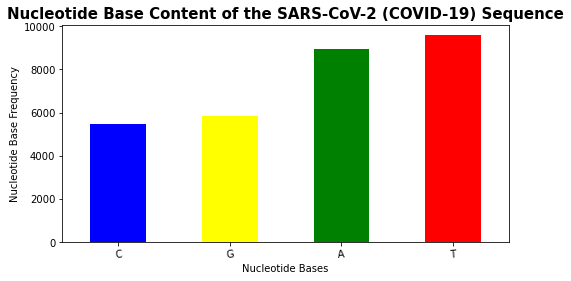

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
a= n_count['frequency'].plot.bar(color= ['blue', 'yellow', 'green', 'red'])
plt.xticks(rotation=5)
plt.ylabel("Nucleotide Base Frequency")
r=list(range(len(n_count)))
plt.xticks(r, n_count.nucleotides)
plt.xlabel("Nucleotide Bases")
plt.title("Nucleotide Base Content of the SARS-CoV-2 (COVID-19) Sequence", weight='bold', size=15)
plt.show()

<i> From the bar chart above, we can say that the %GC content of the SARS-CoV-2 (COVID-19) sequence is less than 50%. To get the percentage of the GC content, the below code can be used. The round function is used to round the percentage to the nearest whole number. It is important to know the %GC content of a sequence as this is an important consideration for primer design in PCR experiments.  <i>

In [43]:
GC_COVID19=GC(DNA)
print ("The GC content of SARS-CoV-2 (COVID-19) is", round(GC_COVID19), "%") 

The GC content of SARS-CoV-2 (COVID-19) is 38 %


#### <u> Transcribing and Translating the Sequence <u>

<i> In order to fully explore the SARS-CoV-2 (COVID-19) sequence, the cDNA sequence is converted into mRNA using the .transcribe() function. This will then allow for the mRNA to be translated into its respective amino acids and its protein sequence can be analysed. The first 200 nucleotide bases can then be printed to ensure this has been done correctly. <i>

In [150]:
Covid19mRNA = Covid19DNA.transcribe()

In [151]:
print(Covid19mRNA[:200])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGU


<i> The cDNA sequence for SARS-CoV-2 (COVID-19) has been correctly converted into mRNA as the thymine (T) base has been swapped for uracil (U) base. The first 200 bases have been printed. <i>

<i> One key disadvanatge of this code is that it does not know what kind of modifications are made either to generate mature mRNA or post-translational modifications made to the proteins. This is why when trying to translate the mRNA into its respctive amino acids, an error message occurs, as 29,903 is not a multiple of 3 which is required when translating mRNA into amino acids. <i>

In [157]:
Amino_Acid = Covid19mRNA.translate()

C:\Users\smej20\Anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


<i> The mRNA of SARS-CoV-2 (COVID19) is translated based upon the Codon Table printed below. <i>

In [158]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [159]:
print("Length of Protein:",len(Amino_Acid))
print(Amino_Acid)

Length of Protein: 9967
IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*

<i> The length of the translated mRNA into amino acids is printed along with the sequence of amino acids to ensure that the translation has been done correctly. In order to identify the amino acid sequences for indivdual proteins, the amino acid sequence was split by the '*' which represents a stop codon for that specific protein sequence. This is shown in the line of code below, the first 10 sequences are then printed. <i>

In [160]:
Proteins = Amino_Acid.split('*')
print(Proteins[:10])

[Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG')]


In [161]:
TotalProteins=pd.DataFrame(Proteins)
TotalProteins.describe()
print("Total Proteins:", len(TotalProteins))

Total Proteins: 775


<i> It is well known that the smallest functional proteins are no shorter than 20 amino acids in length, so all amino acid sequences shorter than this are removed and not included in further analysis. <i>

In [162]:
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)
print("Total Functional Proteins:", len(Proteins))

Total Functional Proteins: 80


<i> The resulting data can then be organised based on the user's preference and future applications. Here, two examples of collating the data obtained is illustrated, either by putting all the sequences into a collective dataframe or placing the sequences into separate files for further investigation. <i>

In [180]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [288]:
proteinas=pd.DataFrame(Proteins)
proteinas['Amino Acid Sequence'] = proteinas[0].apply(str)
proteinas['Protein Length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
Protein_df=pd.DataFrame(pro)
Protein_df

,Amino Acid Sequence,Protein Length
0,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
1,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
2,TALCVHQTFGCSNCTSWSCYG,21
3,DTWCPCPSCGRNTSGLPQGSSS,22
4,HLQWGMSKFCISLKFHNQDYSTKG,24
...,...,...
75,SIQCNTSFRQTWSRTNPRKFWGPGTNQTRN,30
76,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
77,NSSLTAETEETANCDSSSCCRFG,23
78,LNSGLNSCRPHKADGLYKRFRFSVYDI,27


In [164]:
pro.to_excel("Covid19_Protein_Sequence.xlsx")

<i> The preceding lines of code place the protein data into a dataframe which can then be converted into an excel sheet for ease of use. Whilst the lines of code below place each peptide sequence into separate files.  <i>

In [182]:
for count, item in enumerate(Proteins, 1):
     with open(f'Peptide_{count}.fasta', 'w') as f:
        f.write("%s\n" % item)

<i> To investigate the different properties of each suggested protein, the below code was used. This calculates the percentage of each respective amino acid, the molecular weight, the aromaticity, the flexibility, the isoelectric point and secondary structure fraction of each suggested protein. The data collected is then placed into a dataframe. <i>

#### <u> Protein Investigation <u>

In [312]:
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
ProteinProperties= []
Y = pro['Amino Acid Sequence'].to_dict()
for record in Proteins[:]:
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    ProteinProperties.append(
        {
            "Protein of Interest": POI,
            "Amino Acids Percent": str(X.get_amino_acids_percent()),
            "Molecular Weight": MW_list,
            "Aromaticity": X.aromaticity(),
            "Flexibility": X.flexibility(),
            "Isoelectric Point": X.isoelectric_point(),
            "Secondary Structure Fraction": X.secondary_structure_fraction()
        }
    )

df= pd.DataFrame(ProteinProperties)
series = pd.Series(Protein_df['Amino Acid Sequence'], index=Protein_df.index)
Protein_Joined=df.join(series)
ProteinAttributes= Protein_Joined[['Amino Acid Sequence', 'Protein of Interest', 'Amino Acids Percent', 'Molecular Weight', 'Aromaticity','Flexibility', ]]




['Protein of Interest',
 'Amino Acids Percent',
 'Molecular Weight',
 'Aromaticity',
 'Flexibility',
 'Isoelectric Point',
 'Secondary Structure Fraction',
 'Amino Acid Sequence']

<i> The data obtained can be analysed further through the generation of bar charts such as the one created below. Here, the molecular weight of each protein sequence was placed into a separate dataframe which was used to generate a bar chart for the molecular weight of Protein Sequence 49 (Python starts counting at 0, hence in the protein of interest list Protein Sequence 49 is actually number 48 in the list. This is reflected in the code below. <i>

<BarContainer object of 20 artists>

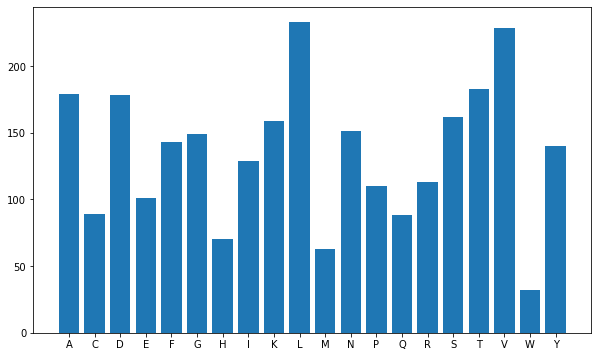

In [186]:
MolecularWeight=pd.DataFrame(data= MW_list,columns= ["Molecular Weights"])
ProteinsofInterest= poi_list[48]
plt.figure(figsize=(10,6));
plt.bar(ProteinsofInterest.keys(), list(ProteinsofInterest.values()), align='center')

<i> From this bar chart and the dataframes above we can see that for Protein Sequence 49, the molecular weight is high in comparison to the other sequences, with the predomiant amino acids being leucine and valine. This is due to the sequence being considerably longer than the other sequences, being 2701 amino acids in length. <i>

<i> Protein sequences of interest can then be further investigated by matching them with online databases. Here, NCBI Blast is used to match an identified protein sequence of interest, in this case Protein Sequence 49, to a non redundant protein database. The data obtained from this search is then written and saved to an 'xml' file. <i>

In [189]:
fasta_string = open("Peptide_49.fasta").read()
result_handle = NCBIWWW.qblast(
"blastp",
"nr", 
fasta_string, hitlist_size=10,
)
save_file = open("pep49out.xml", "w")

save_file.write(result_handle.read())

save_file.close()

result_handle.close()

#### <u> Primer Design of Regions of Interest <u>

<i> In order to experimentally test expression levels of specific mRNA transcripts produced by SARS-CoV-2 (COVID19) it would be useful to design primers for polymerase chain reaction (PCR) and quantitative polymerase chain reaction (qPCR) experiments. The lines of code below allow us to do this through the use of Primer3. Here, it possible to specify the exact parameters required want for primer design, including specifying the TM, GC content and size for each primer.  <i>

In [ ]:
Primers=primer3.designPrimers(
    {
        "SEQUENCE_ID": "COVID-19",
        "SEQUENCE_TEMPLATE": str(DNA),
        "SEQUENCE_INCLUDED_REGION": [36,342]
    },
    {
        'PRIMER_OPT_SIZE': 20,
        'PRIMER_INTERNAL_MAX_SELF_END': 8,
        'PRIMER_MIN_SIZE': 18,
        'PRIMER_MAX_SIZE': 25,
        'PRIMER_OPT_TM': 60.0,
        'PRIMER_MIN_TM': 57.0,
        'PRIMER_MAX_TM': 63.0,
        'PRIMER_MIN_GC': 20.0,
        'PRIMER_MAX_GC': 80.0,
        'PRIMER_MAX_POLY_X': 100,
        'PRIMER_SALT_MONOVALENT': 50.0,
        'PRIMER_DNA_CONC': 50.0,
        'PRIMER_MAX_NS_ACCEPTED': 0,
        'PRIMER_MAX_SELF_ANY': 12,
        'PRIMER_MAX_SELF_END': 8,
        'PRIMER_PAIR_MAX_COMPL_ANY': 12,
        'PRIMER_PAIR_MAX_COMPL_END': 8,
        'PRIMER_PRODUCT_SIZE_RANGE': [[75,100],[100,125],[125,150],
                                      [150,175],[175,200],[200,225]],
    })

In [ ]:
Primer = pd.DataFrame(Primers)
Primer_Table=Primer[:1] #keep top 1
Primer_final= Primer_Table.transpose()

In [ ]:
print_full(Primer_final)

In [ ]:
Primer_final.to_excel("Primers.xlsx")

#### <u> Comparison of SARS-CoV-2

In [126]:
SARS= SeqIO.read("SARS.fasta.txt", "fasta")

In [127]:
MERS= SeqIO.read("MERS.fasta.txt", "fasta")

In [190]:
print('Sequence Lengths:')
print('SARS:', len(SARS.seq))
print('COVID19:', len(Covid19.seq))
print('MERS:', len(MERS.seq))

Sequence Lengths:
SARS: 29751
COVID19: 29903
MERS: 30119


In [191]:

SARS_COV = pairwise2.align.globalxx(SARS.seq, Covid19.seq, one_alignment_only = True, score_only = True)
print('SARS/COVID19 Similarity (%): ', SARS_COV / len(SARS.seq) * 100)

MERS_COV = pairwise2.align.globalxx(MERS.seq, Covid19.seq, one_alignment_only = True, score_only = True)
print('MERS/COVID19 Similarity (%): ', MERS_COV / len(MERS.seq) * 100)

MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only = True, score_only = True)
print('MERS/COV Similarity (%): ', MERS_SARS / len(SARS.seq) * 100)

SARS/COVID19 Similarity (%):  83.33837518066619
MERS/COVID19 Similarity (%):  69.39141405757164
MERS/COV Similarity (%):  69.93714496991697


<BarContainer object of 3 artists>

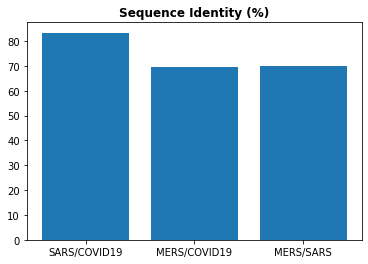

In [194]:
X = ['SARS/COVID19', 'MERS/COVID19', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence Identity (%)', weight="bold")
plt.bar(X,Y)